# AirBnB Listing Analysis
Analyze AirBnB listings in Paris to determine the impact of recent regulations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Profile & QA the data

In [ ]:
#I read the file "Listings.csv"
df_listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1')
df_listings2 = pd.read_csv('Listings2.csv',encoding='ISO-8859-1')
df_litings = pd.concat([df_listings, df_listings2], ignore_index=True)

#I use ISO-8859-1 encoding because I have characters that can't be decoded by UTF-8

In [5]:
pd.set_option('display.max_columns', None)
df_listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
#I convert any date column as a date and time format
df_listings['host_since'] = pd.to_datetime(df_listings['host_since'])

In [7]:
#I filter the rows where the city is Paris and keep only the columns  ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’.
columns_to_keep = ['host_since','neighbourhood','city','accommodates','price']
df_listings_paris = df_listings[df_listings['city'] == 'Paris'][columns_to_keep]
df_listings_paris.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [8]:
#I check for missing values
df_listings_paris.isnull().sum()

host_since       17
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [9]:
# I calculate the minimum, maximum, and average of each numeric field
df_listings_paris.describe()

,host_since,accommodates,price
count,32852,32869.000000,32869.000000
mean,2015-12-03 01:40:41.056861184,3.253400,117.230004
min,2008-09-09 00:00:00,0.000000,0.000000
25%,2014-04-07 00:00:00,2.000000,60.000000
50%,2015-07-08 00:00:00,3.000000,83.000000
75%,2017-06-28 00:00:00,4.000000,120.000000
max,2021-02-06 00:00:00,16.000000,12000.000000
std,NaN,1.666725,223.713607


## Prepare the data for visualization

In [10]:
#List of average price for each neighbourhood
paris_listings_neighbourhood = df_listings_paris.groupby('neighbourhood')['price'].mean().sort_values()
paris_listings_neighbourhood

neighbourhood
Menilmontant            78.340716
Buttes-Chaumont         89.986387
Buttes-Montmartre       91.864609
Popincourt              92.082785
Reuilly                 95.126563
Observatoire            98.000000
Enclos-St-Laurent      102.912495
Batignolles-Monceau    103.860942
Vaugirard              114.634663
Gobelins               119.650691
Opera                  120.085411
Pantheon               125.869399
Hotel-de-Ville         141.997201
Temple                 147.765931
Palais-Bourbon         147.902413
Bourse                 155.572587
Luxembourg             157.899378
Passy                  161.276385
Louvre                 186.077455
Elysee                 202.536532
Name: price, dtype: float64

In [14]:
paris_listings_accomodations = df_listings_paris.groupby(['accommodates'])['price'].mean().sort_values()
paris_listings_accomodations

accommodates
0       0.000000
1      56.340376
2      81.153825
3      93.927171
4     122.888288
5     169.681066
6     219.287229
7     261.394161
8     320.143443
9     391.508197
10    570.584416
13    640.833333
14    703.000000
11    721.304348
12    786.627119
16    803.764706
15    893.666667
Name: price, dtype: float64

In [15]:
#Average price based on the year you've been hosting
df_listings_paris['host_since_year'] = df_listings_paris["host_since"].dt.year
paris_listings_over_time = df_listings_paris.groupby('host_since_year')['price']
print("Average price based on the year you've been hosting")
paris_listings_over_time.mean().sort_values()

Average price based on the year you've been hosting


host_since_year
2014.0    102.760766
2013.0    108.613685
2012.0    111.687785
2011.0    112.838951
2015.0    114.327832
2017.0    118.179655
2021.0    119.000000
2016.0    124.753981
2019.0    124.837300
2008.0    125.000000
2020.0    127.425701
2010.0    133.842105
2018.0    149.325012
2009.0    244.600000
Name: price, dtype: float64

In [16]:
#Host count based on the year since they are hosts
print('Host count based on the year since they are hosts')
paris_listings_over_time.count()

Host count based on the year since they are hosts


host_since_year
2008.0       1
2009.0      35
2010.0     171
2011.0     534
2012.0    1973
2013.0    4209
2014.0    5689
2015.0    6604
2016.0    4207
2017.0    2143
2018.0    2043
2019.0    3319
2020.0    1891
2021.0      33
Name: price, dtype: int64

## Visualize the data and summarize findings

### Average price by neighborhood in Paris

In [17]:
df_paris_listings_neighbourhood = paris_listings_neighbourhood.reset_index()
df_paris_listings_neighbourhood.columns = ['neighbourhood', 'average_price']

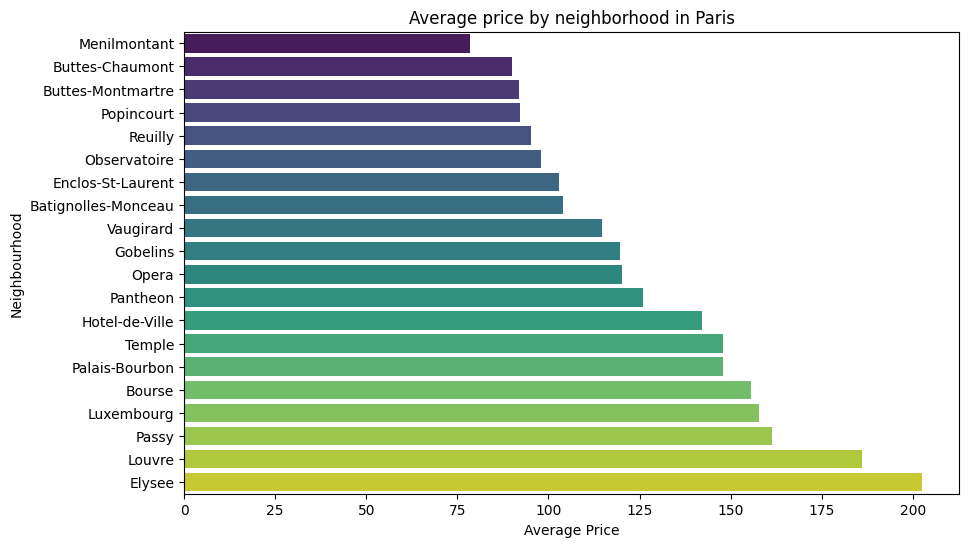

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(x='average_price', y='neighbourhood', data=df_paris_listings_neighbourhood , orient='h', palette='viridis', legend = False, hue =  'neighbourhood');
plt.title('Average price by neighborhood in Paris')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

### Average price by number of ‘accommodates’ in Paris’ 

In [19]:
df_paris_listings_accomodations = paris_listings_accomodations.reset_index()
df_paris_listings_accomodations.columns = ['accomodations','average_price']

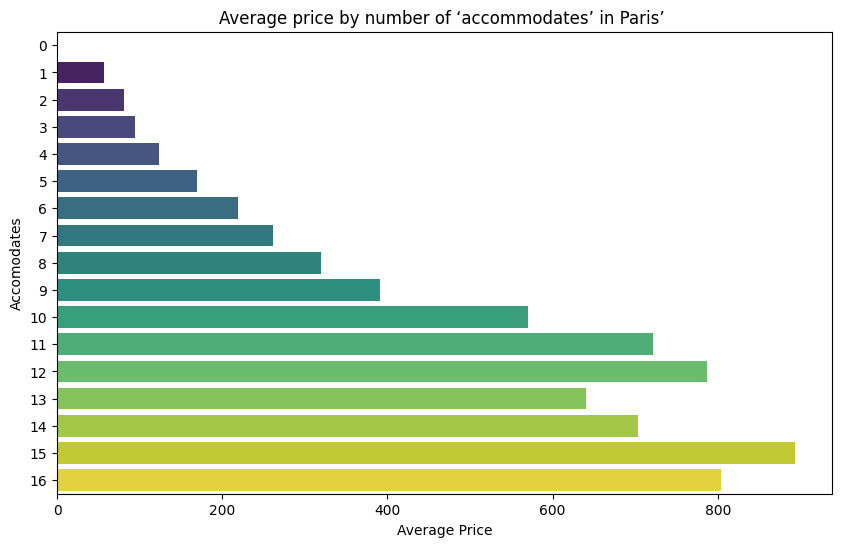

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(x='average_price', y='accomodations', data=df_paris_listings_accomodations , orient='h', palette='viridis', legend = False, hue =  'accomodations')
plt.title('Average price by number of ‘accommodates’ in Paris’ ')
plt.xlabel('Average Price')
plt.ylabel('Accomodates')
plt.show()

### Count of new hosts over time, and average price.

In [25]:
df_paris_listings_over_time = paris_listings_over_time.count().reset_index()
df_paris_listings_over_time.columns = ['year','count']

df_paris_listings_over_time_price = paris_listings_over_time.mean().sort_values().reset_index()
df_paris_listings_over_time_price.columns = ['year','avg_price']

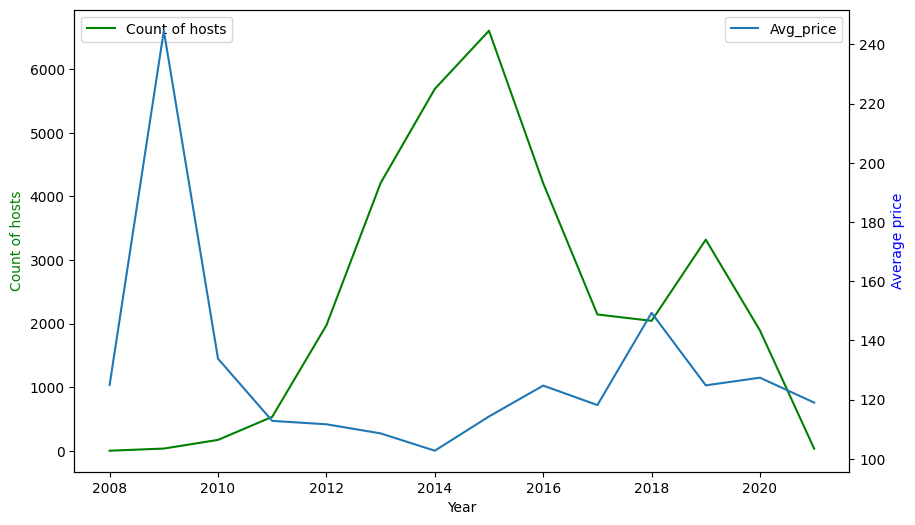

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_paris_listings_over_time, x='year', y='count', label='Count of hosts', color = 'green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of hosts', color='green')
ax2 = ax1.twinx()
sns.lineplot(data=df_paris_listings_over_time_price, x='year', y='avg_price', label='Avg_price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average price', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Taking into account that in 2015 there were restrictions on the number of new hosts for Airbnb, it can be observed that from that year onwards the number of hosts decreased sharply and the average price of accommodations increased.